# 1

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('diabetes.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


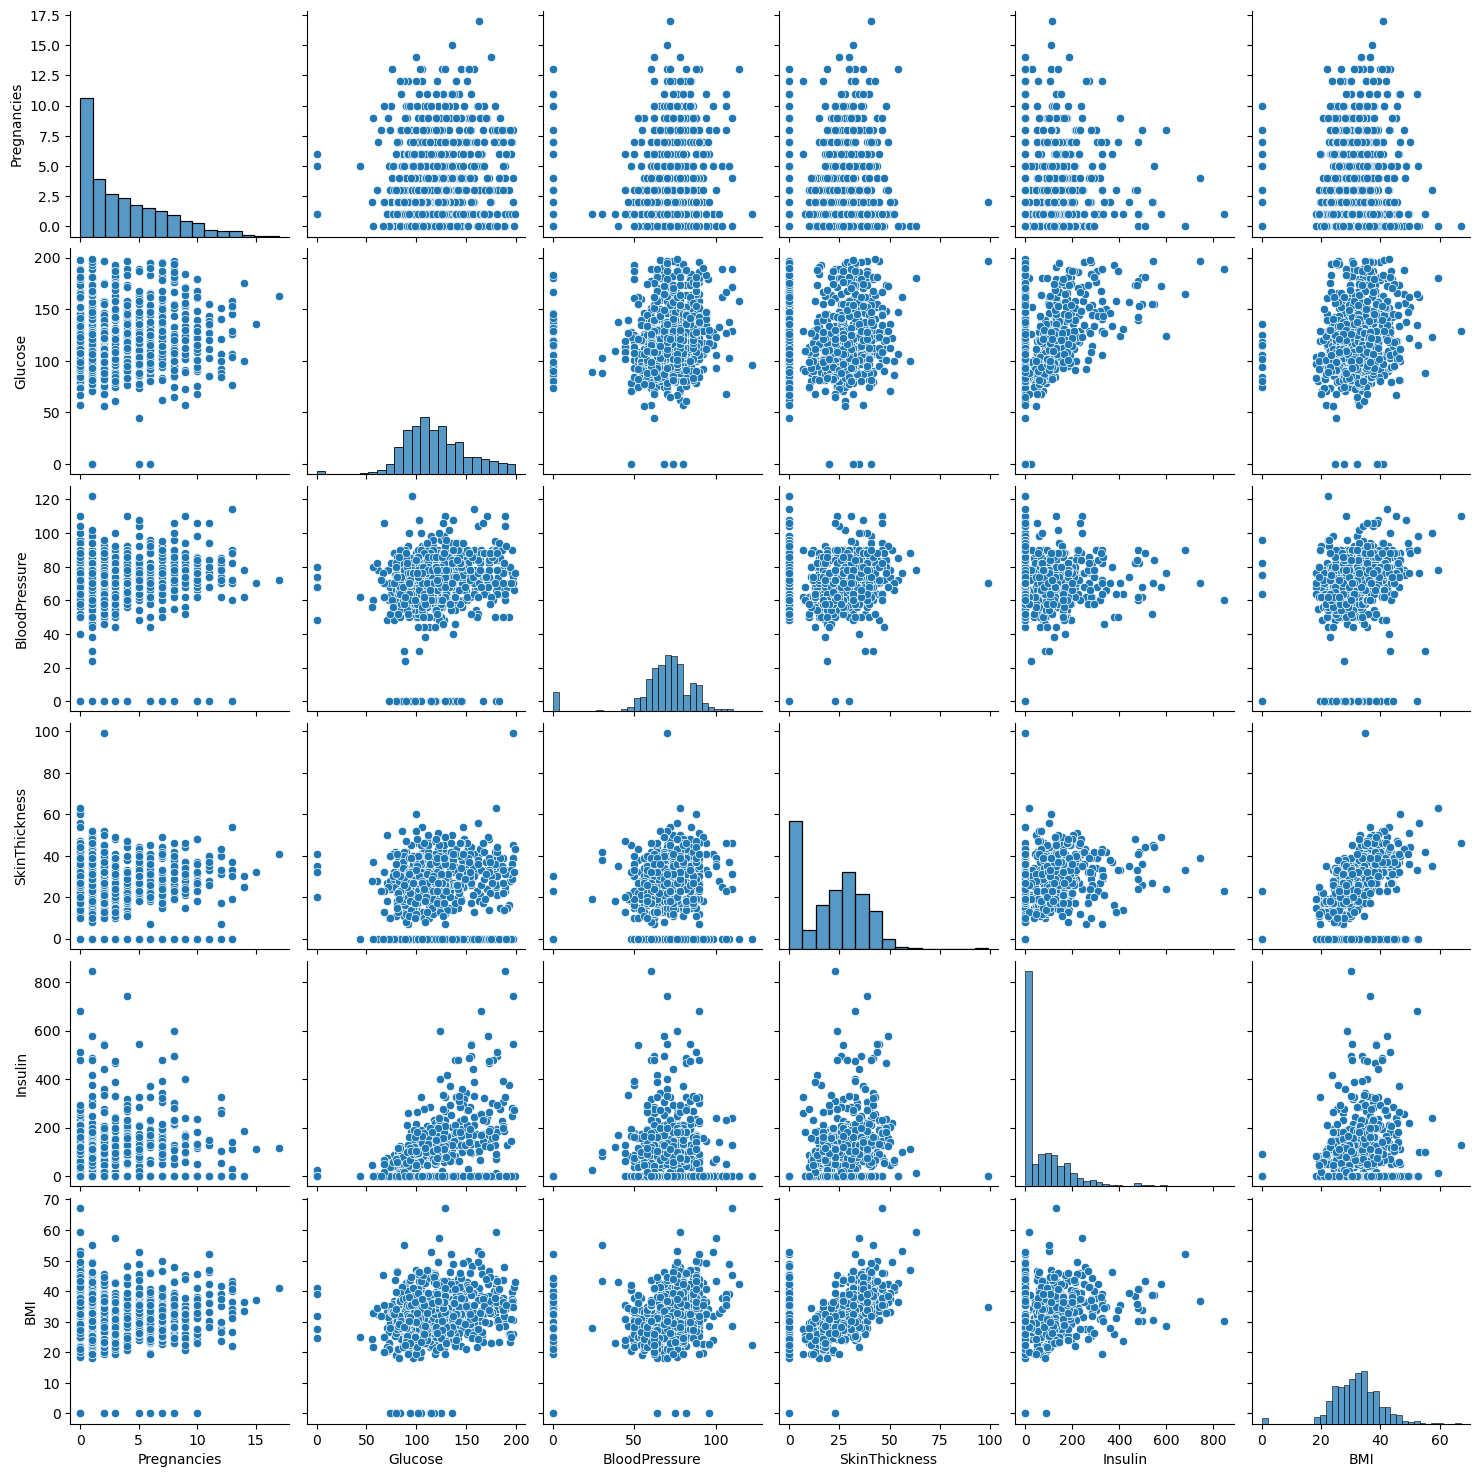

In [15]:
sns.pairplot(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']])

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot: xlabel='Outcome', ylabel='count'>

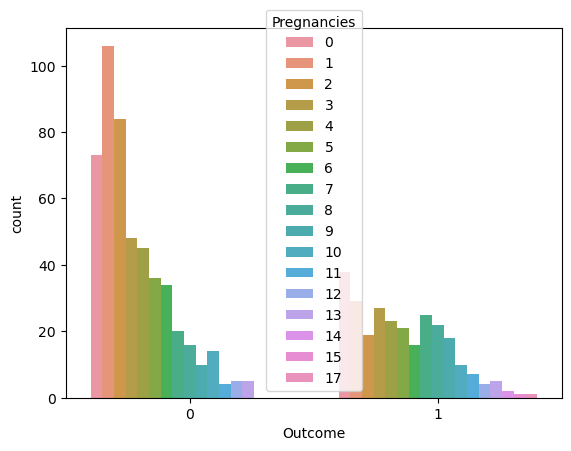

In [19]:
sns.countplot(data=df,x='Outcome',hue='Pregnancies')

<AxesSubplot: xlabel='Glucose', ylabel='BloodPressure'>

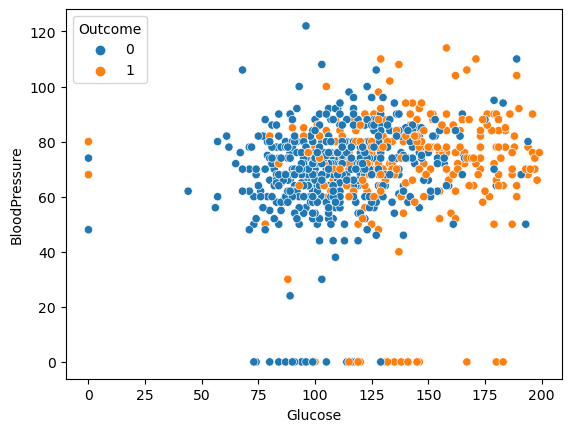

In [20]:
sns.scatterplot(x='Glucose',y='BloodPressure',data=df,hue='Outcome')

# 2

In [22]:
# Check for the outliers

<AxesSubplot: ylabel='Pregnancies'>

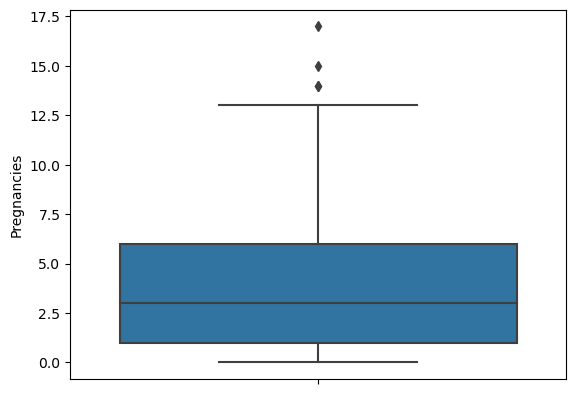

In [32]:
sns.boxplot(y='Pregnancies',data=df)

<AxesSubplot: ylabel='BMI'>

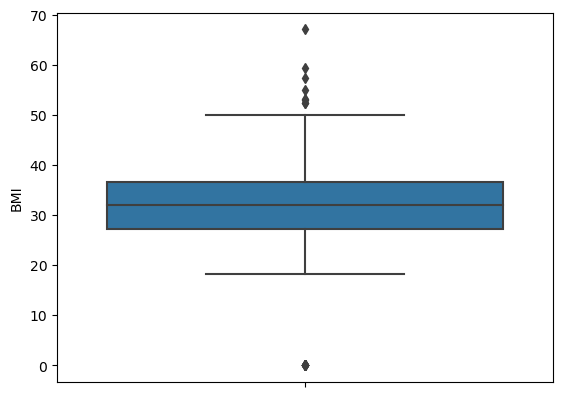

In [33]:
sns.boxplot(y='BMI',data=df)

<AxesSubplot: ylabel='Age'>

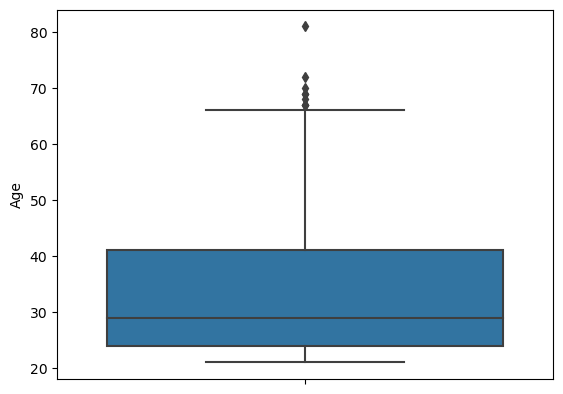

In [44]:
sns.boxplot(y='Age',data=df)

In [67]:
a= np.percentile(df['Age'],95)
a

54.0

In [63]:
#Remove these outliers
df = df[df['Age']<=63]

In [64]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot: xlabel='Age'>

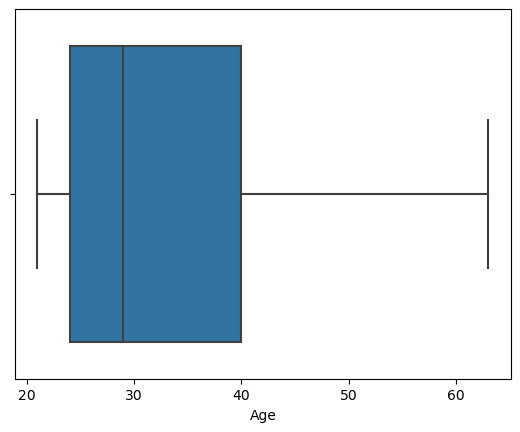

In [65]:
sns.boxplot(x='Age',data=df)

# 3 

In [69]:
#Splitting data into independent and dependent features

In [71]:
X=df.iloc[:,:-1]
y=df['Outcome']

In [68]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
247,0,165,90,33,680,52.3,0.427,23
331,2,87,58,16,52,32.7,0.166,25
355,9,165,88,0,0,30.4,0.302,49
503,7,94,64,25,79,33.3,0.738,41
104,2,85,65,0,0,39.6,0.930,27


In [74]:
y_train.head()

247    0
331    0
355    1
503    0
104    0
Name: Outcome, dtype: int64

# 4

In [87]:
# Model Implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [88]:
treeclassifier = DecisionTreeClassifier()

In [89]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [90]:
tree_cv = GridSearchCV(treeclassifier,param_grid=param_grid,cv=5)

In [91]:
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [92]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [93]:
y_pred=tree_cv.predict(X_test)

# 5

In [94]:
# Confusion matrix and classification report

In [95]:
from sklearn.metrics import confusion_matrix,classification_report

In [100]:
confusion_matrix(y_test,y_pred)

array([[123,  47],
       [ 33,  45]])

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       170
           1       0.49      0.58      0.53        78

    accuracy                           0.68       248
   macro avg       0.64      0.65      0.64       248
weighted avg       0.69      0.68      0.68       248



In [101]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

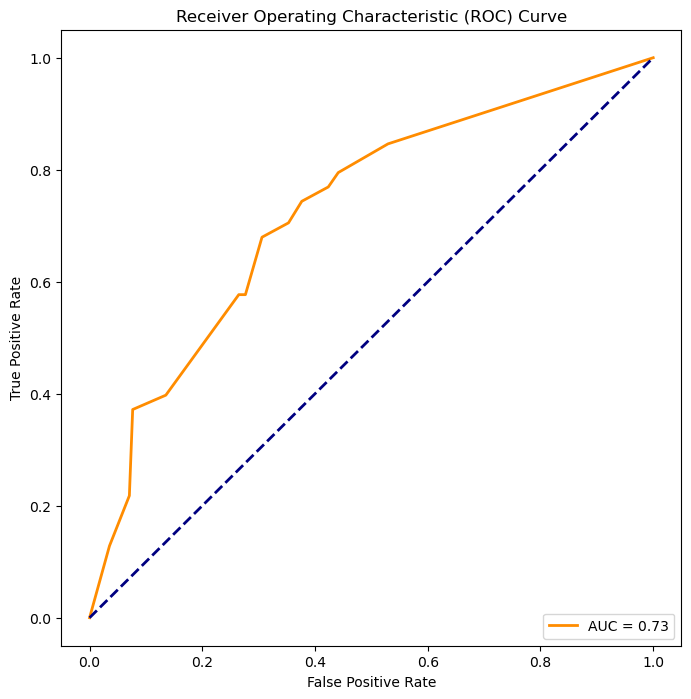

In [102]:
# Get predicted probabilities for the positive class
y_probs = tree_cv.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the Area Under the Curve (AUC) score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 6

In [116]:
## Tree Visualisation
from sklearn.tree import plot_tree

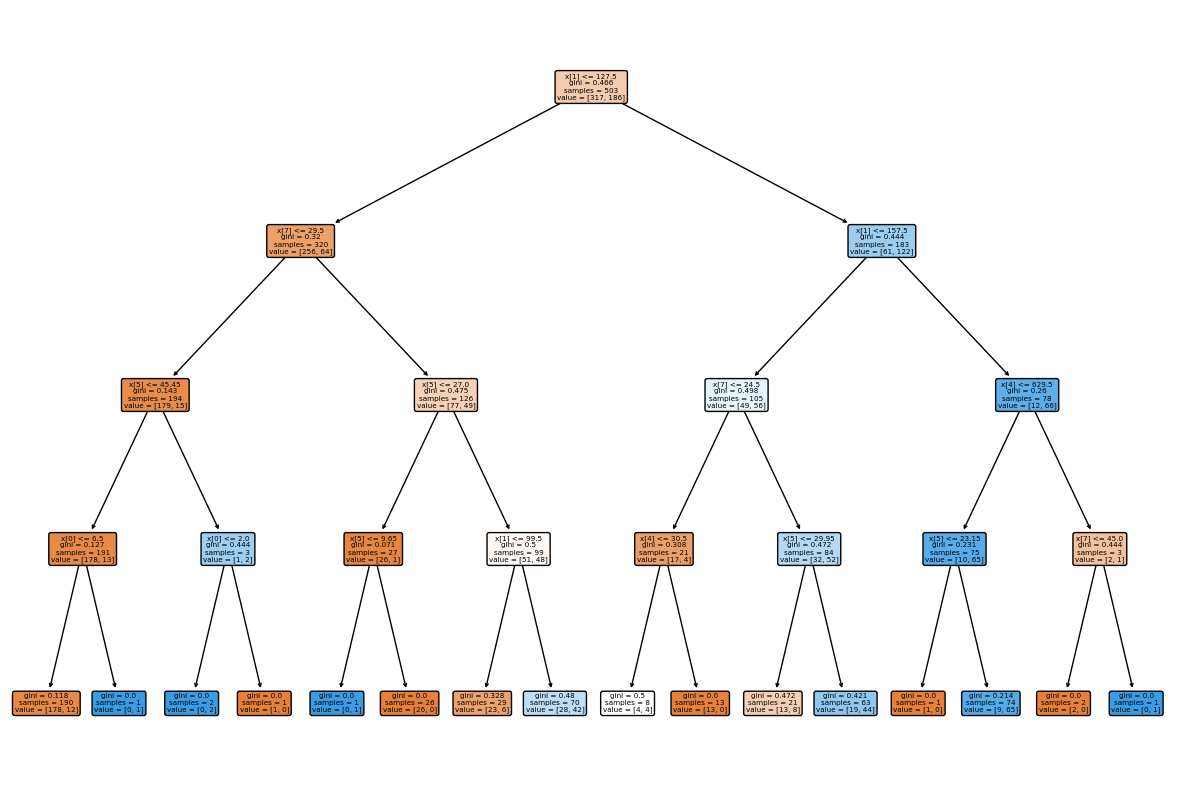

In [117]:
treeclassifier=DecisionTreeClassifier(max_depth=4)
treeclassifier.fit(X_train,y_train)
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(treeclassifier,filled=True, rounded=True)
plt.show()

# 7

In [118]:
from sklearn.metrics import confusion_matrix,classification_report

In [119]:
y_pred=tree_cv.predict(X_test)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       170
           1       0.49      0.58      0.53        78

    accuracy                           0.68       248
   macro avg       0.64      0.65      0.64       248
weighted avg       0.69      0.68      0.68       248

